In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV,  RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

# Load lemmatized data

In [84]:
data = pd.read_csv('./data/lemmatized_posts.csv')

In [85]:
data.head()

,post,sent_score,post_nochars,post_tokenized,post_lemmatized,joined_words
0,middle aged guys don't buy sports cars because...,1,middle aged guys don't buy sports cars because...,"['middle', 'aged', 'guys', 'buy', 'sports', 'c...","['middle', 'age', 'guy', 'buy', 'sport', 'car'...",middle age guy buy sport car mid life crisis f...
1,"""y'all"" is a brilliant use of the english lang...",1,"""y'all"" is a brilliant use of the english lang...","['brilliant', 'use', 'english', 'language', 'r...","['brilliant', 'use', 'english', 'language', 'r...",brilliant use english language refuse tell oth...
2,i always eat dessert before dinner at a restau...,1,i always eat dessert before dinner at a restau...,"['always', 'eat', 'dessert', 'dinner', 'restau...","['always', 'eat', 'dessert', 'dinner', 'restau...",always eat dessert dinner restaurantwhen resta...
3,it should be illegal for a company to list an ...,1,it should be illegal for a company to list an ...,"['illegal', 'company', 'list', 'entry', 'level...","['illegal', 'company', 'list', 'entry', 'level...",illegal company list entry level job require y...
4,news should be a dry recitation of facts. if i...,1,news should be a dry recitation of facts. if i...,"['news', 'dry', 'recitation', 'facts', 'opinio...","['news', 'dry', 'recitation', 'fact', 'opinion...",news dry recitation fact opinion intend stir e...


In [86]:
data.shape

(3584, 6)

### Train Random Forests ensemble ML model using lammatized data

In [87]:
X = data['joined_words']
y = data['sent_score']

In [88]:
1 - y.mean()

0.4659598214285714

In [89]:
# split the data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.4, random_state = 2024)

In [90]:
#instantiate a CounterVectorizer
cvec = CountVectorizer()
cvec.fit(X_train)

CountVectorizer()

In [91]:
X_train_cv = cvec.transform(X_train)
X_test_cv = cvec.transform(X_test)

In [92]:
X_train_cv.shape

(2150, 13220)

In [93]:
rf = RandomForestClassifier(n_estimators = 500, oob_score = True,
                           random_state = 2024)

In [94]:
rf.fit(X_train_cv, y_train)

RandomForestClassifier(n_estimators=500, oob_score=True, random_state=2024)

In [95]:
rf.score(X_train_cv, y_train)

1.0

In [96]:
rf.score(X_test_cv, y_test)

0.9518828451882845

In [97]:
rf.oob_score_

0.9544186046511628

In [98]:
rf.feature_importances_

array([8.44697511e-06, 3.59789263e-06, 5.08195708e-06, ...,
       6.21110894e-06, 5.89521627e-06, 0.00000000e+00])

In [99]:
p = X_train_cv.shape[1]

### Search for best parameters for RandomForestClassifier

In [100]:
params = {
    'max_features': np.arange(1, p+1),
    'max_depth': np.append(np.arange(1,9), None),
    'min_samples_leaf': np.arange(1, 31)
}
rf = RandomForestClassifier(
    n_estimators=100,
    random_state=2023)
    
rs = RandomizedSearchCV(
    rf, param_distributions=params, n_iter=100, cv=5, n_jobs=8 )

In [101]:
%%time
rs.fit(X_train_cv, y_train)

CPU times: total: 13 s
Wall time: 13min 41s


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=2023),
                   n_iter=100, n_jobs=8,
                   param_distributions={'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, None], dtype=object),
                                        'max_features': array([    1,     2,     3, ..., 13218, 13219, 13220]),
                                        'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])})

In [111]:
rs.score(X_train_cv, y_train)

0.98

In [112]:
rs.score(X_test_cv, y_test)

0.9232914923291492

In [113]:
rs.best_params_

{'min_samples_leaf': 2, 'max_features': 4540, 'max_depth': None}

#### Apply trained random forest  ML for Sentiment prediction of  college posts.

In [114]:
college = pd.read_csv('./data/coll_lemmatized_posts.csv')

In [115]:
college.head()

,post,sent_score,post_tokenized,post_lemmatized,joined_words
0,ever have a kid in class show up and realize i...,0,"['ever', 'kid', 'class', 'show', 'realize', 'e...","['ever', 'kid', 'class', 'show', 'realize', 'e...",ever kid class show realize exam day get leave...
1,"it’s the little things that count, this profes...",0,"['little', 'things', 'count', 'professor', 'ge...","['little', 'thing', 'count', 'professor', 'gem...",little thing count professor gem stay late com...
2,professor saved my assduring winter term at my...,0,"['professor', 'saved', 'assduring', 'winter', ...","['professor', 'save', 'assduring', 'winter', '...",professor save assduring winter term uni bad m...
3,my professor gave out all the answers to the f...,0,"['professor', 'gave', 'answers', 'final', 'lef...","['professor', 'give', 'answer', 'final', 'leav...",professor give answer final leave exam hall ce...
4,an honest letter from your university presiden...,0,"['honest', 'letter', 'university', 'president'...","['honest', 'letter', 'university', 'president'...",honest letter university president open fallde...


In [116]:
X_coll = college['joined_words']
y_coll = college['sent_score']

In [120]:
cvec = CountVectorizer()
cvec.fit(X_train)

CountVectorizer()

In [121]:
X_coll_cv = cvec.transform(X_coll)

In [123]:
rf.fit(X_train_cv, y_train)
coll_predictions = rf.predict(X_coll_cv)

In [124]:
print(classification_report(coll_predictions, y_coll, digits = 3))

              precision    recall  f1-score   support

           0      0.977     1.000     0.988      1632
           1      0.000     0.000     0.000        38

    accuracy                          0.977      1670
   macro avg      0.489     0.500     0.494      1670
weighted avg      0.955     0.977     0.966      1670



C:\Users\mudep\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mudep\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mudep\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


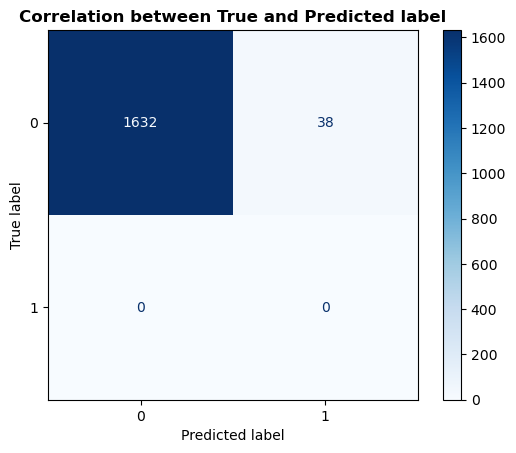

In [125]:
ConfusionMatrixDisplay.from_predictions(y_coll, coll_predictions, cmap = 'Blues')
plt.title('Correlation between True and Predicted label', weight = 'bold');

## *Vulgar language warning!!!!*

#### List of all false predicetd posts 

In [45]:
pred_colls = pd.DataFrame(coll_predictions, columns=['predictions'])

In [72]:

false_pred = college.iloc[pred_colls[pred_colls['predictions'] == 1].index]
false_pred

,post,sent_score,post_tokenized,post_lemmatized,joined_words
41,walked in on my roommate sucking his own dicki...,0,"['walked', 'roommate', 'sucking', 'dicki', 'ho...","['walked', 'roommate', 'suck', 'dicki', 'hones...",walked roommate suck dicki honestly mind much ...
43,tip for people using zoomyour teachers will kn...,0,"['tip', 'people', 'using', 'zoomyour', 'teache...","['tip', 'people', 'use', 'zoomyour', 'teacher'...",tip people use zoomyour teacher know zoom like...
45,it’s honestly disgusting what happened to easy...,0,"['honestly', 'disgusting', 'happened', 'easybi...","['honestly', 'disgust', 'happen', 'easybibyoun...",honestly disgust happen easybibyounger zoomers...
51,roomate goes to bed so early and gets annoyed ...,0,"['roomate', 'goes', 'bed', 'early', 'gets', 'a...","['roomate', 'go', 'bed', 'early', 'get', 'anno...",roomate go bed early get annoy tok move dorm f...
100,"i don't know who needs to hear this, but... . ...",0,"['know', 'needs', 'hear', 'go', 'drink', 'glas...","['know', 'need', 'hear', 'go', 'drink', 'glass...",know need hear go drink glass water eat health...
129,quarantine group chatbecause you’re bored and ...,0,"['quarantine', 'group', 'chatbecause', 'bored'...","['quarantine', 'group', 'chatbecause', 'bore',...",quarantine group chatbecause bore new
133,"ladies, if your backpack is fully pulling up t...",0,"['ladies', 'backpack', 'fully', 'pulling', 'ba...","['lady', 'backpack', 'fully', 'pull', 'back', ...",lady backpack fully pull back skirt tell every...
158,should i tell my roommate he shakes our bunk b...,0,"['tell', 'roommate', 'shakes', 'bunk', 'beds',...","['tell', 'roommate', 'shake', 'bunk', 'bed', '...",tell roommate shake bunk bed he rub one roomma...
173,get your flu shotsseriously guys. just go to c...,0,"['get', 'flu', 'shotsseriously', 'guys', 'go',...","['get', 'flu', 'shotsseriously', 'guy', 'go', ...",get flu shotsseriously guy go cvs get free flu...
210,"people who's schools skipped spring break, how...",0,"['people', 'schools', 'skipped', 'spring', 'br...","['people', 'school', 'skip', 'spring', 'break'...",people school skip spring break well


### Generate a plot based on scores from all models that applied to lemmetized posts

In [133]:
score = [
    ['baseModel', 0.46, 0],
    ['LogReg', 1, 0.96],
    ['RandomForest', 0.96, 0.92],
    ['MultinomialNB', 0.98, 0.95],
    ['BernoulliNB', 0.98, 0.95],
    ['LinearSVC', 1, 0.95]
    
]

In [134]:
dfscore  = pd.DataFrame(score, columns = ['ML Model', 'Train', 'Test'])

In [135]:
dfscore 

,ML Model,Train,Test
0,baseModel,0.46,0.00
1,LogReg,1.00,0.96
2,RandomForest,0.96,0.92
3,MultinomialNB,0.98,0.95
4,BernoulliNB,0.98,0.95
5,LinearSVC,1.00,0.95


<Figure size 400x400 with 0 Axes>

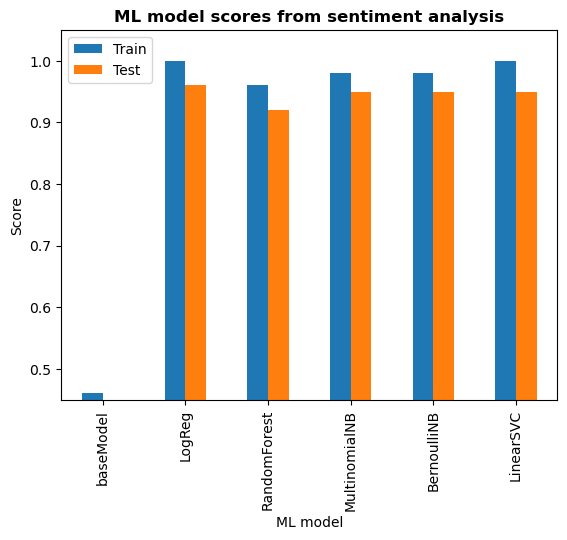

In [136]:
plt.figure(figsize = (4,4))
dfscore.plot(x = 'ML Model', y = ['Train', 'Test'], kind = 'bar')
plt.xlabel('ML model')
plt.ylabel('Score')
plt.ylim(0.45, 1.05)
plt.title('ML model scores from sentiment analysis', weight = 'bold');